In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime as dt
import copy
import os
from sklearn.linear_model import LinearRegression
import random

In [5]:
path_daily_anoms = '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/'

In [6]:
list_datasets_anoms = np.sort(glob.glob(f'{path_daily_anoms}*.nc'))

In [7]:
list_datasets_anoms

array(['/glade/scratch/jhayron/Data4Predictability/DailyAnoms/IC_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/IT_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/MLD_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC100_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC200_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC300_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC50_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC700_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OLR_ERA5.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SD_ERA5.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SSH_SODA.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SST_OISSTv2.nc',
       '/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SST_SODA.nc'

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/IC_SODA.nc
2023-08-14 09:50:27.749497


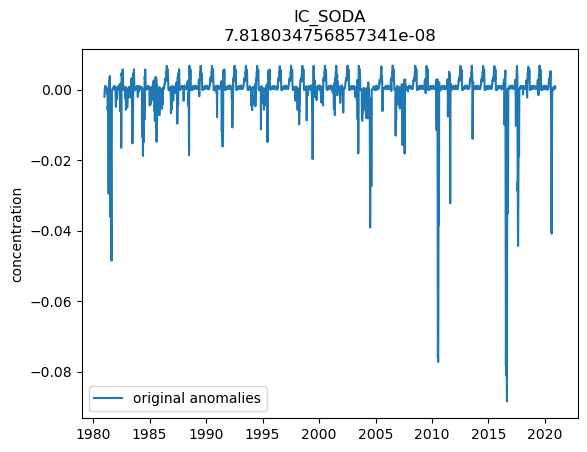

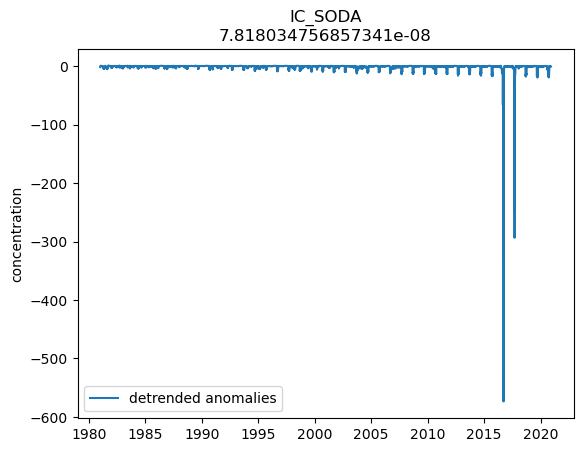

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/IT_SODA.nc
2023-08-14 09:50:35.517175


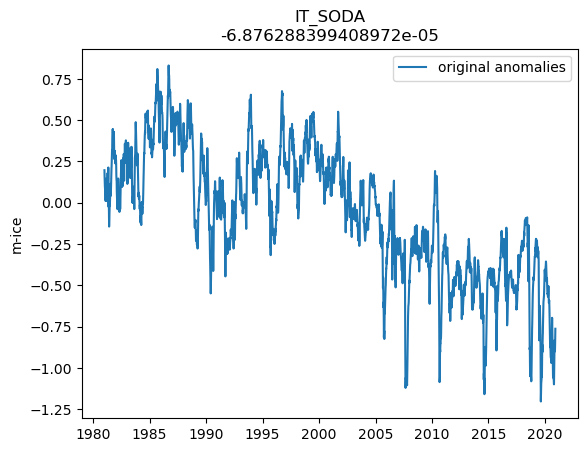

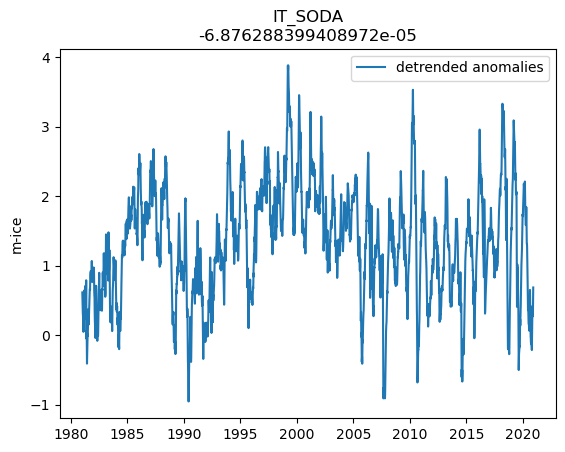

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/MLD_SODA.nc
2023-08-14 09:50:43.017688


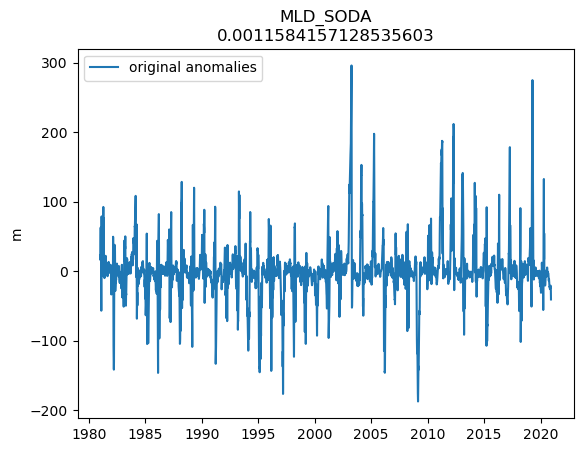

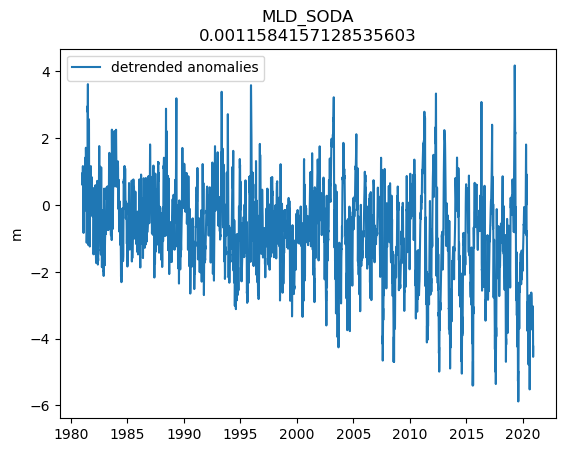

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC100_SODA.nc
2023-08-14 09:50:52.630124


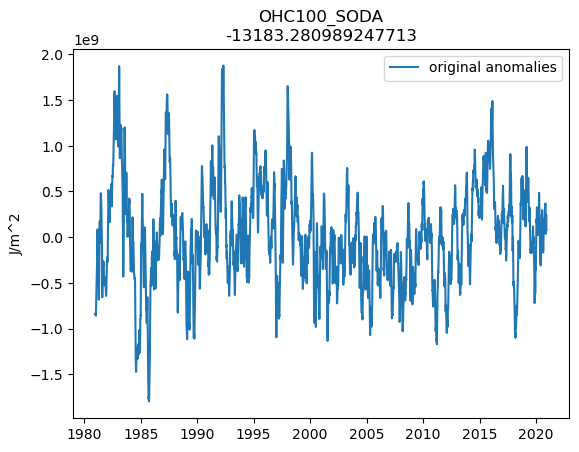

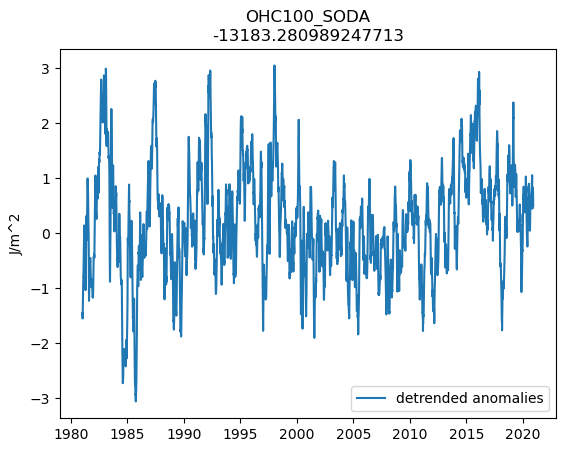

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC200_SODA.nc
2023-08-14 09:51:01.858004


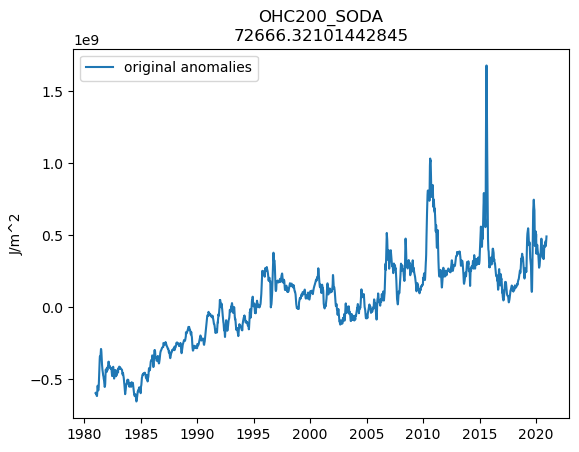

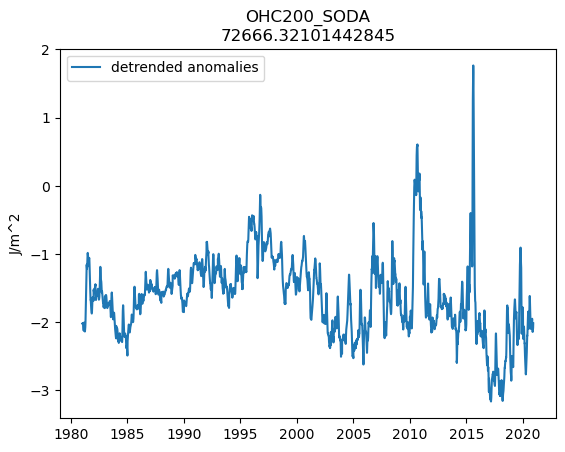

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC300_SODA.nc
2023-08-14 09:51:08.643703


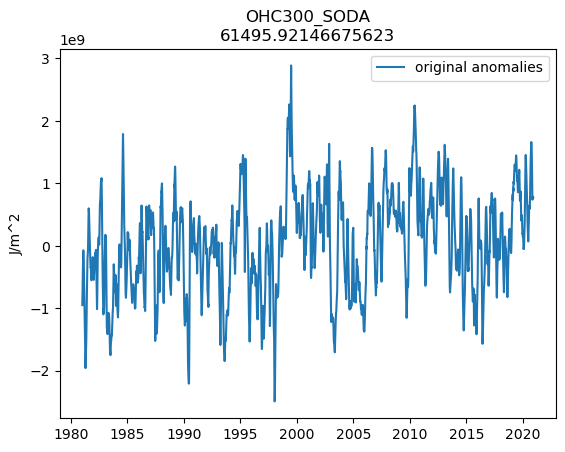

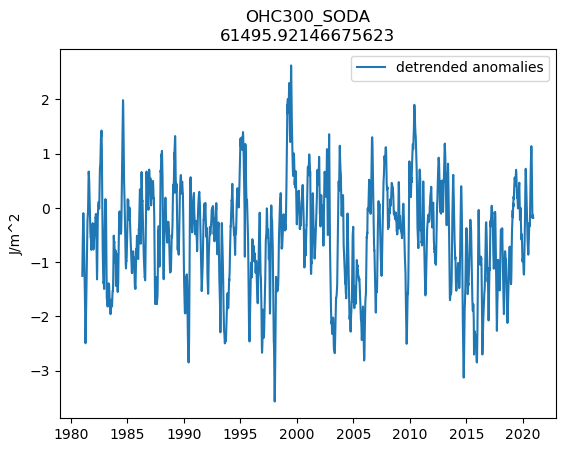

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC50_SODA.nc
2023-08-14 09:51:16.803913


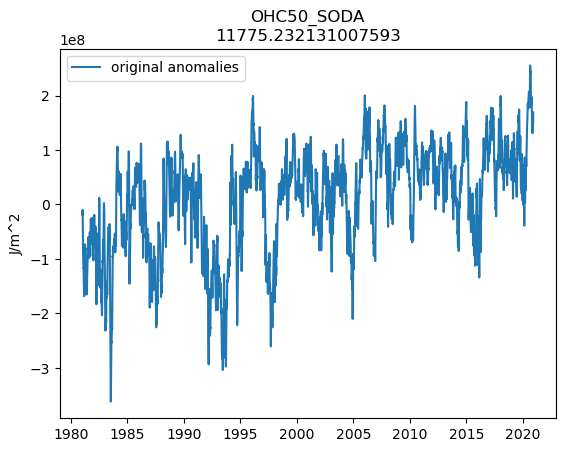

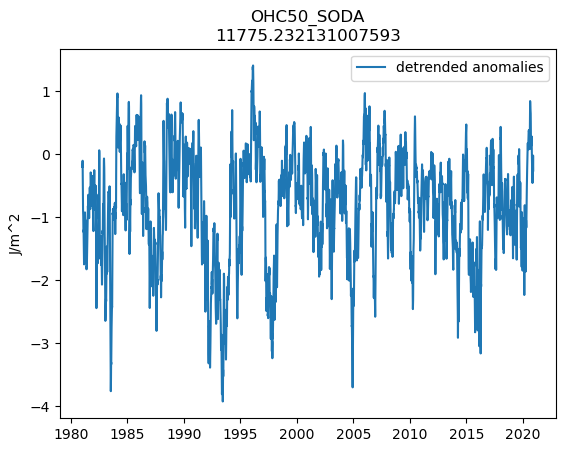

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OHC700_SODA.nc
2023-08-14 09:51:24.689017


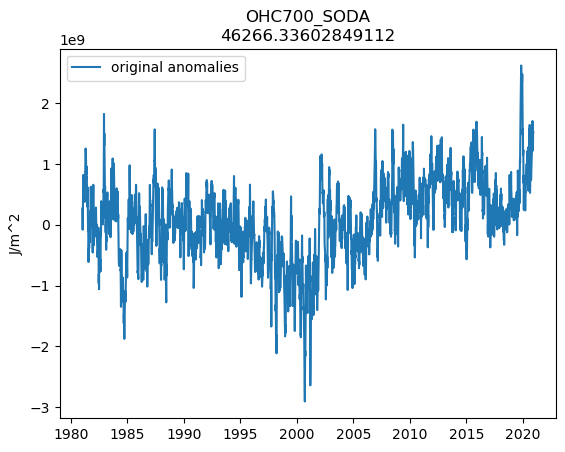

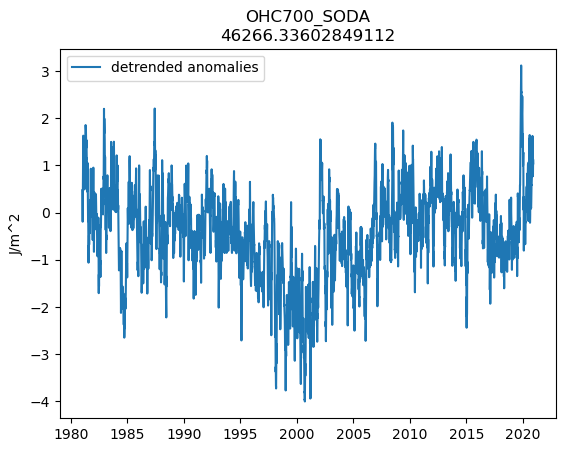

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/OLR_ERA5.nc
2023-08-14 09:51:32.197742


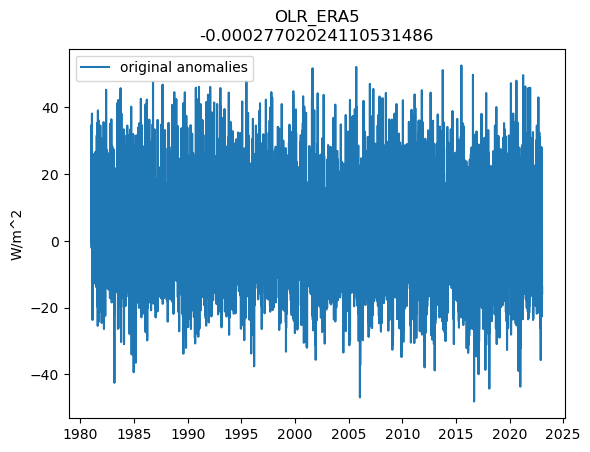

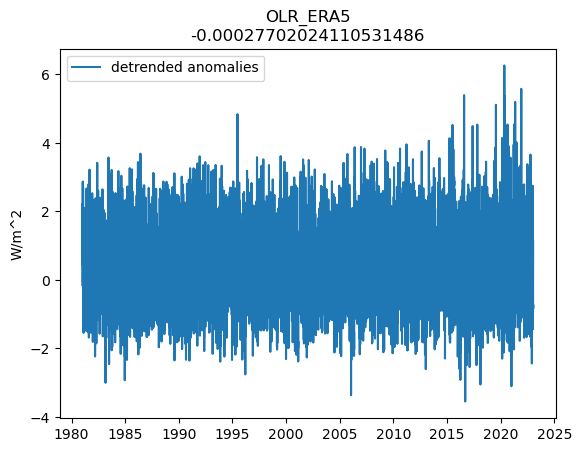

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SD_ERA5.nc
2023-08-14 09:51:37.850005


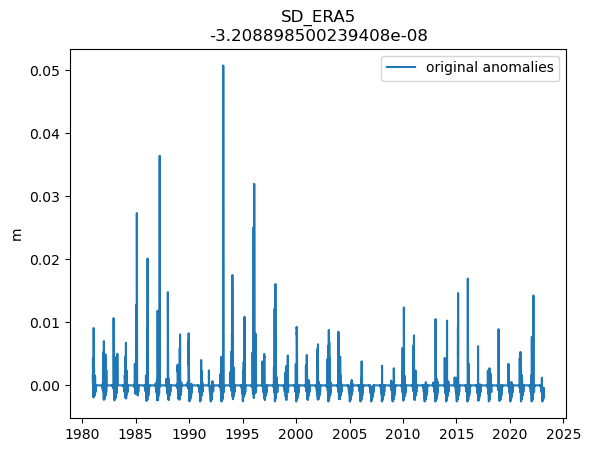

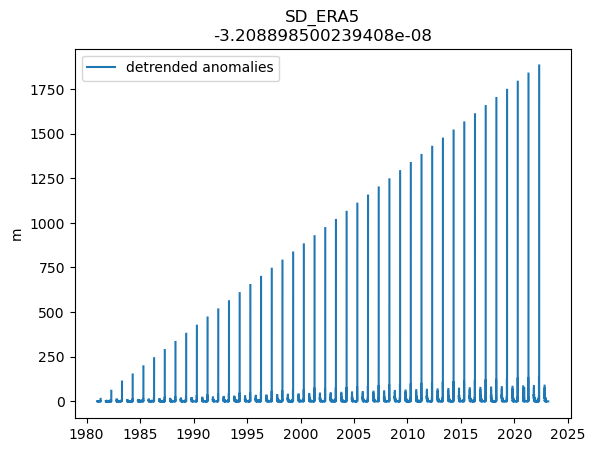

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SSH_SODA.nc
2023-08-14 09:51:44.248697


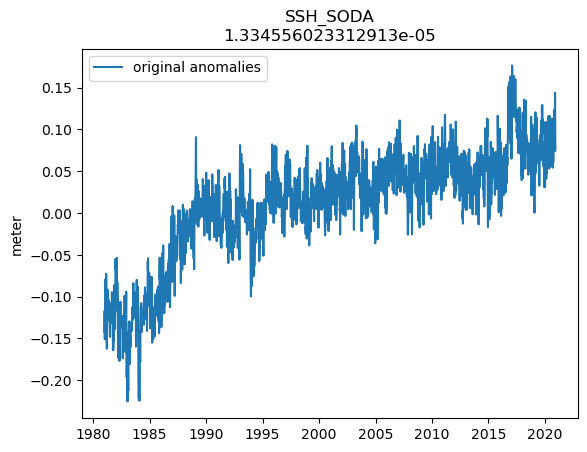

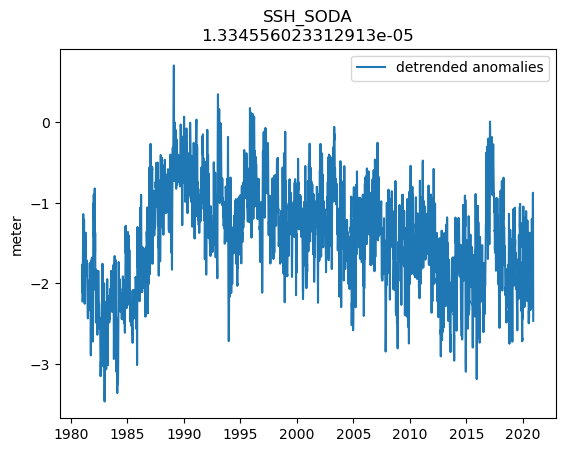

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SST_OISSTv2.nc
2023-08-14 09:51:51.404102


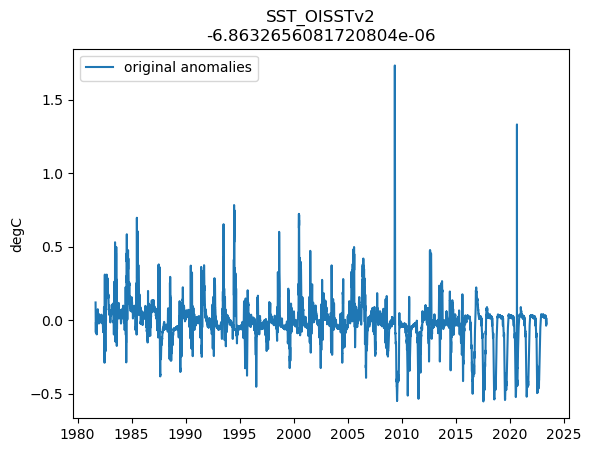

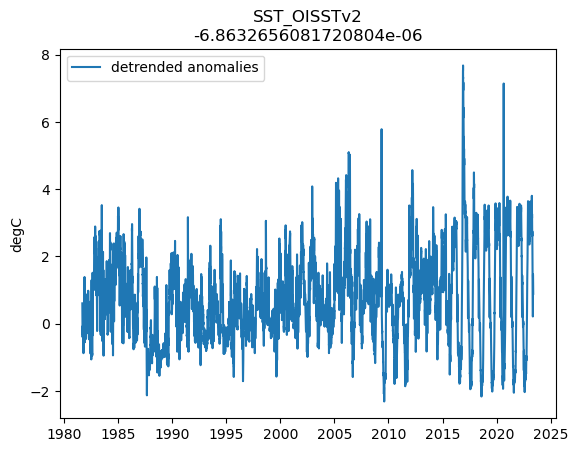

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SST_SODA.nc
2023-08-14 09:52:30.492240


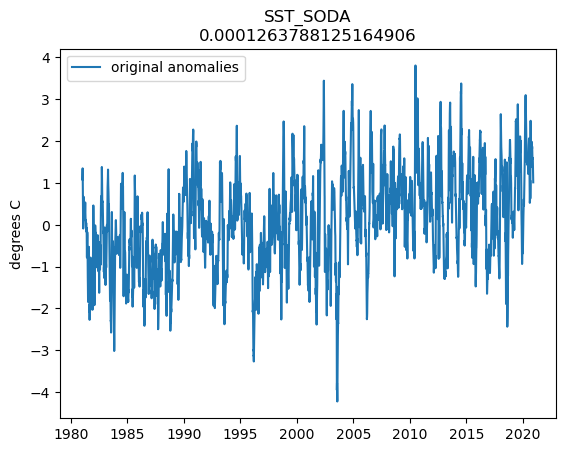

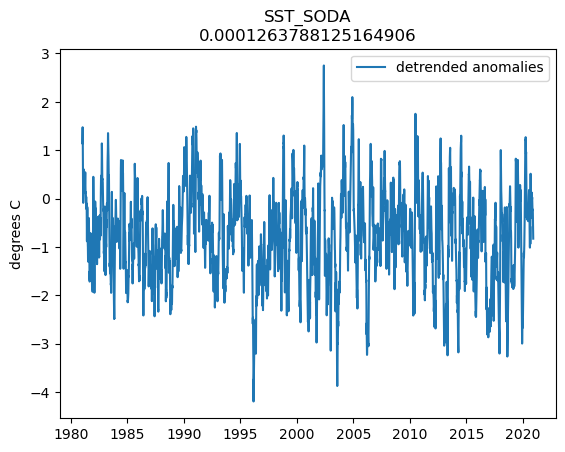

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/STL_1m_ERA5.nc
2023-08-14 09:52:38.371889


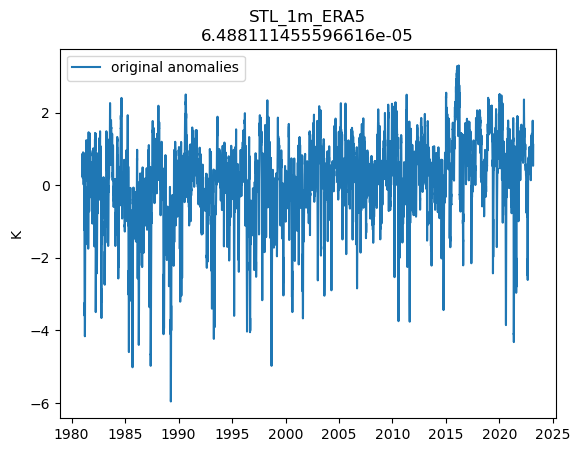

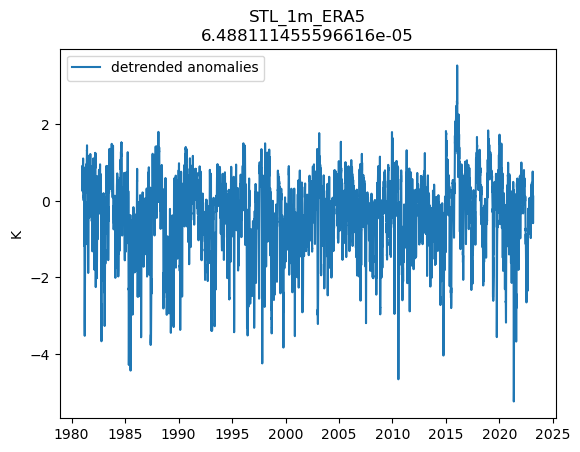

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/STL_28cm_ERA5.nc
2023-08-14 09:52:43.752129


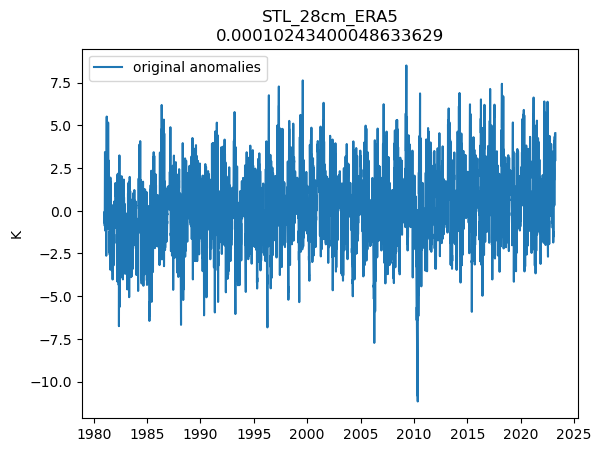

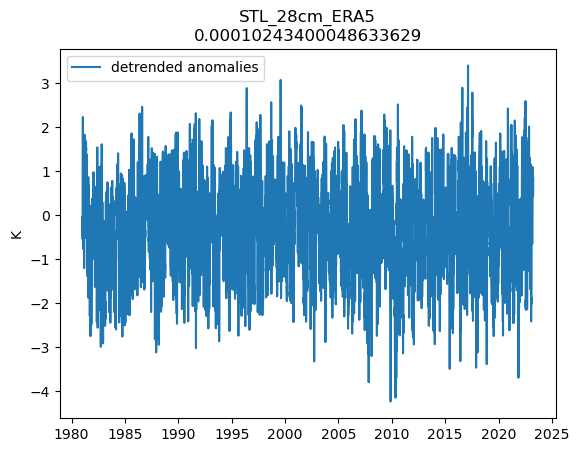

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/STL_7cm_ERA5.nc
2023-08-14 09:52:49.765836


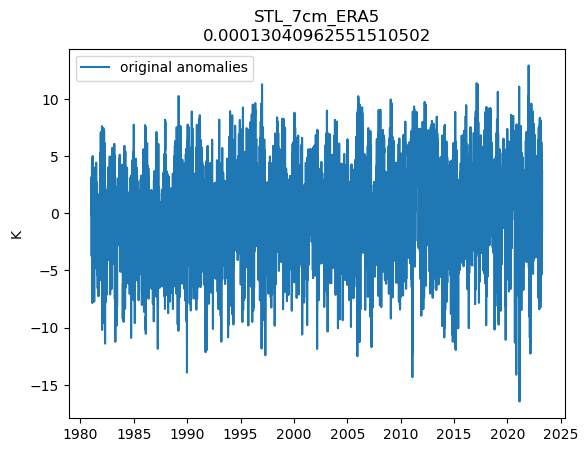

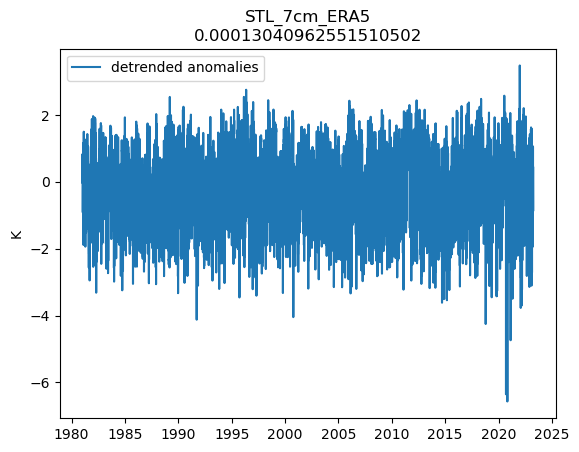

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/STL_full_ERA5.nc
2023-08-14 09:52:55.528657


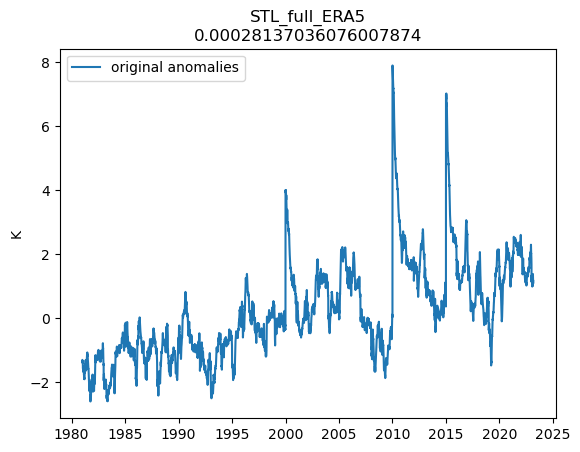

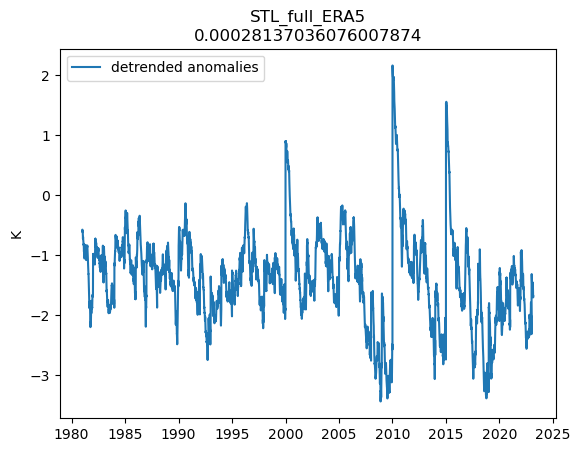

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SWVL_1m_ERA5.nc
2023-08-14 09:53:01.157978


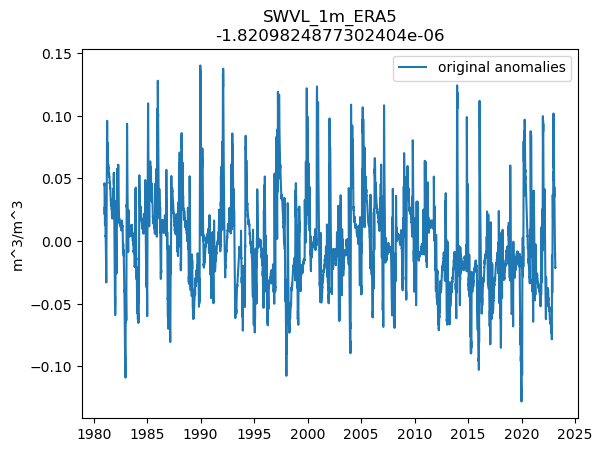

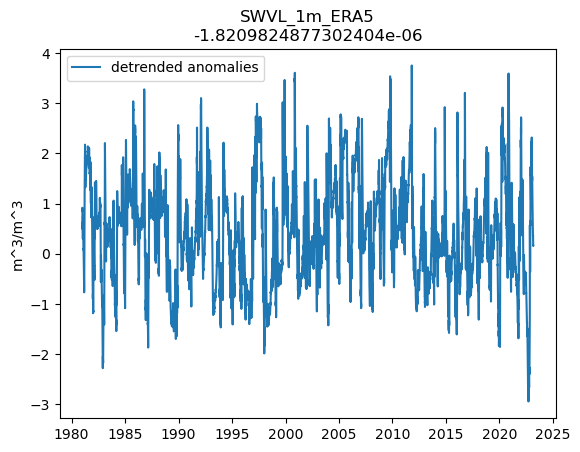

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SWVL_28cm_ERA5.nc
2023-08-14 09:53:06.772096


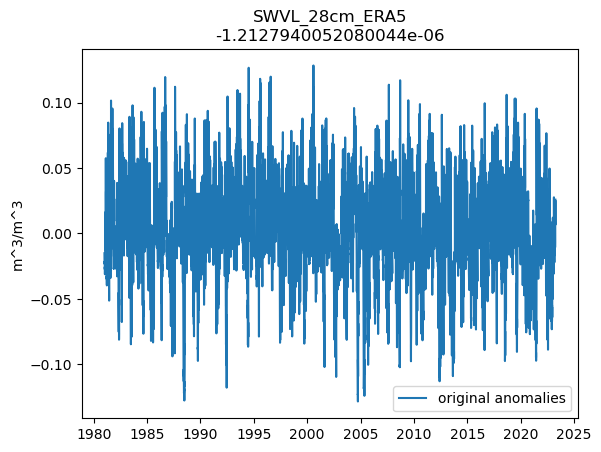

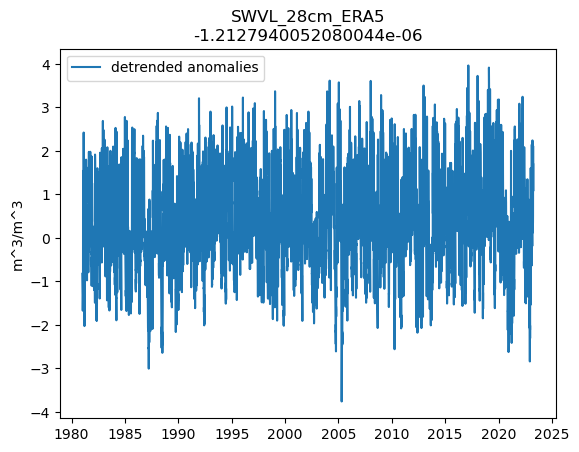

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SWVL_7cm_ERA5.nc
2023-08-14 09:53:12.439436


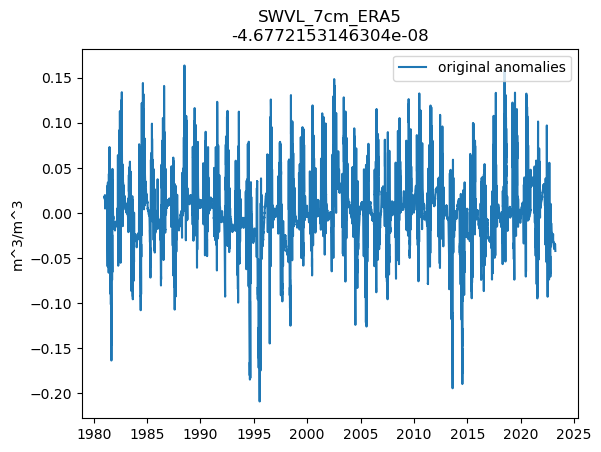

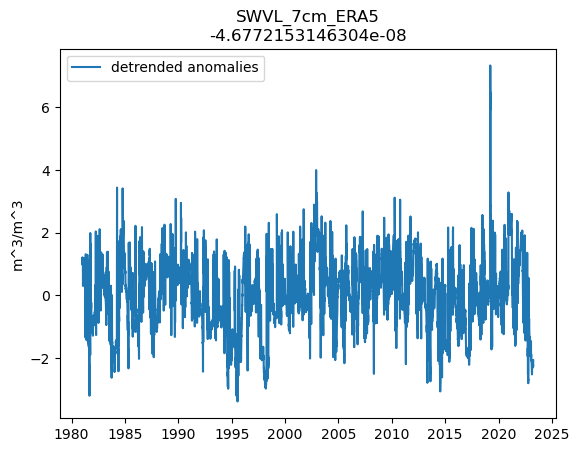

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/SWVL_full_ERA5.nc
2023-08-14 09:53:18.250533


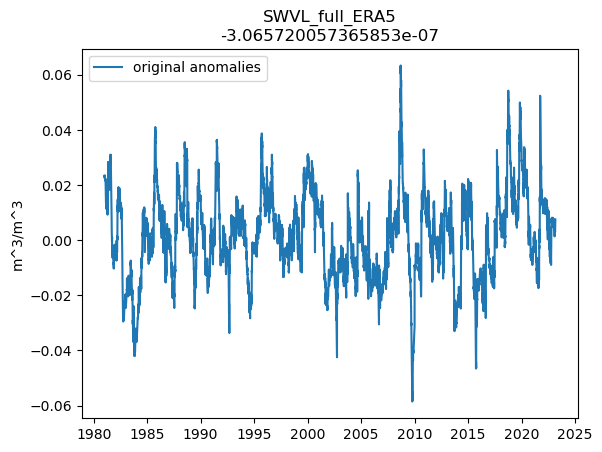

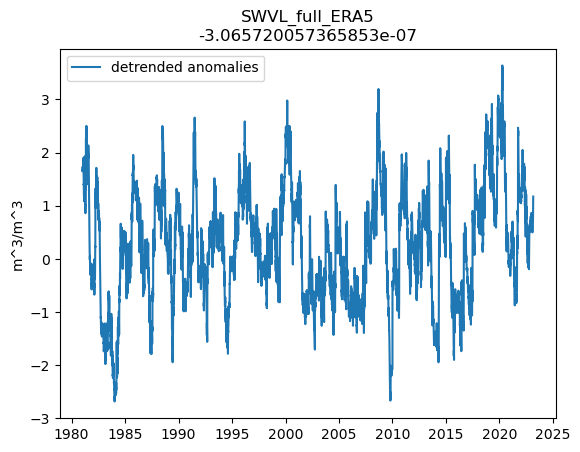

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/U10_ERA5.nc
2023-08-14 09:53:24.441651


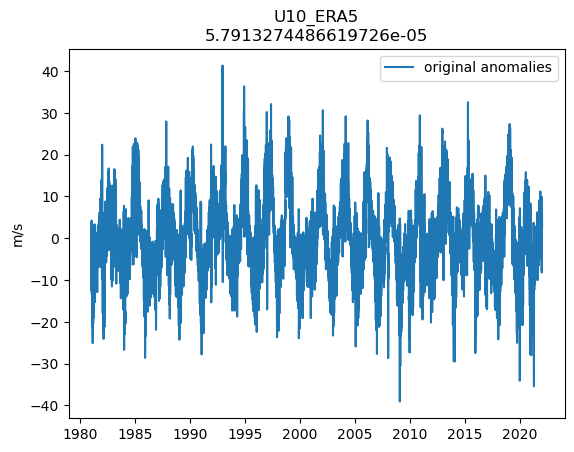

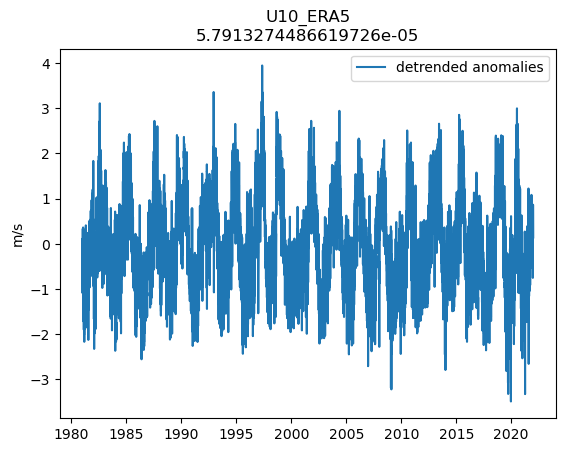

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/U200_ERA5.nc
2023-08-14 09:53:29.504810


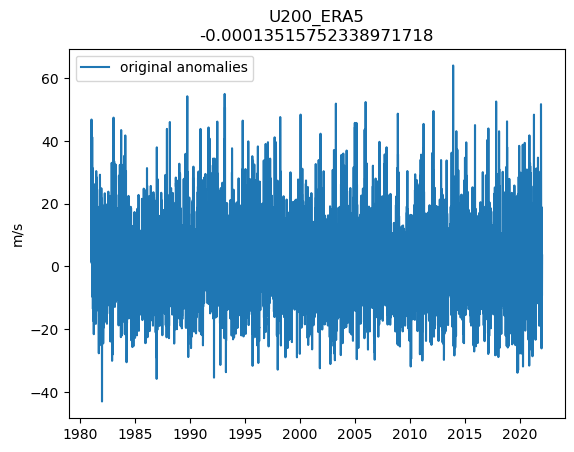

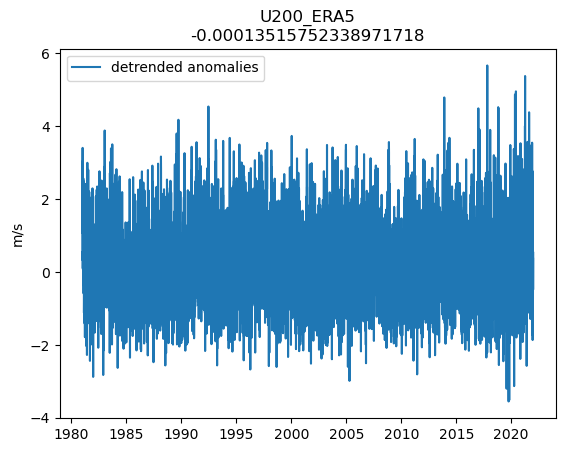

/glade/scratch/jhayron/Data4Predictability/DailyAnoms/Z500_ERA5.nc
2023-08-14 09:53:35.393403


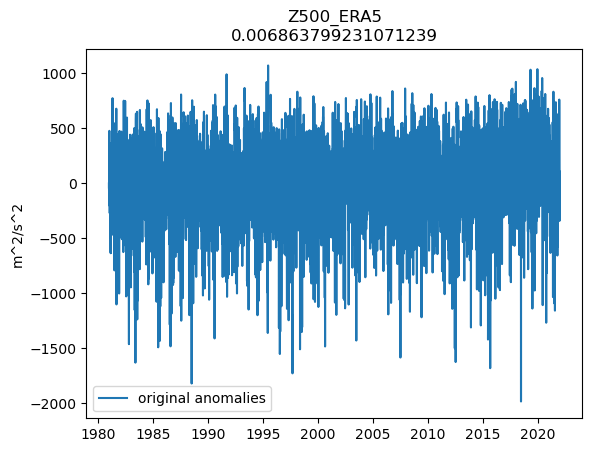

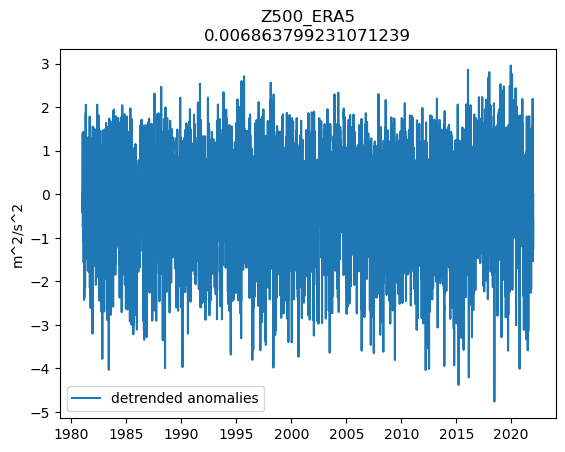

In [9]:
for i_dataset in range(0,len(list_datasets_anoms)):
# for i_dataset in range(0,1):
    print(list_datasets_anoms[i_dataset])
    print(dt.datetime.now())
    path_anoms = list_datasets_anoms[i_dataset]
    anomalies = xr.open_dataset(path_anoms)
    var_name_xarray = list(anomalies.data_vars.keys())[0]

    path_trends = list_datasets_anoms[i_dataset].replace('DailyAnoms','trends')
    path_anoms_final = list_datasets_anoms[i_dataset].replace('DailyAnoms','DailyDetrendedStdAnoms')

    trend = xr.open_dataset(path_trends)
    detrended_anomalies = xr.open_dataset(path_anoms_final)
    
    #### Pick random grid cell ####
    where_non_zero = np.where((trend[var_name_xarray.replace('anomalies','trend')].values!=0)&\
                         (np.isfinite(trend[var_name_xarray.replace('anomalies','trend')].values)==True))


    rand_index = random.choice(np.arange(len(where_non_zero[0])))
    ind_lat = where_non_zero[0][rand_index]
    ind_lon = where_non_zero[1][rand_index]
    trend_temp = trend.isel(lat=ind_lat,lon=ind_lon)[var_name_xarray.replace\
                     ('anomalies','trend')].values[()]

    series_detrended_anoms = detrended_anomalies.isel(lat=ind_lat,lon=ind_lon)[var_name_xarray].values
    series_anoms = anomalies.isel(lat=ind_lat,lon=ind_lon)[var_name_xarray].values

    #### Plot anomalies ####
    plt.plot(anomalies.time.values,series_anoms,label = 'original anomalies')
    # plt.plot(anomalies.time.values,series_detrended_anoms, label = 'detrended anomalies')
    plt.ylabel(anomalies[var_name_xarray].units)
    namefile = list_datasets_anoms[i_dataset].split('/')[-1][:-3]
    plt.title(f'{namefile}\n{trend_temp}')
    plt.legend()
    plt.show()
    plt.close('all')
    
    #### Plot anomalies ####
    # plt.plot(anomalies.time.values,series_anoms,label = 'original anomalies')
    plt.plot(anomalies.time.values,series_detrended_anoms, label = 'detrended anomalies')
    plt.ylabel(anomalies[var_name_xarray].units)
    namefile = list_datasets_anoms[i_dataset].split('/')[-1][:-3]
    plt.title(f'{namefile}\n{trend_temp}')
    plt.legend()
    plt.show()
    plt.close('all')

In [10]:
series_detrended_anoms.mean()

-0.10398684

In [11]:
series_anoms.mean()

18.583712

In [22]:
len(where_non_zero[0])

85214

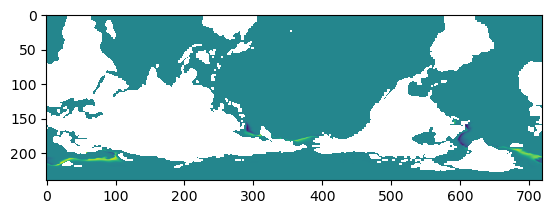

In [17]:
plt.imshow(detrended_anomalies.isel(time=0)[var_name_xarray])

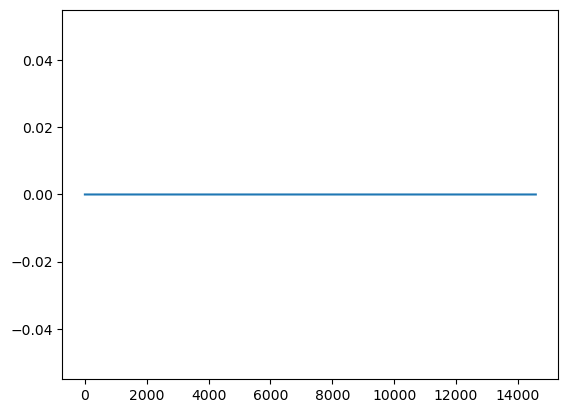

In [16]:
plt.plot(detrended_anomalies.isel(lat=0,lon=0)[var_name_xarray])

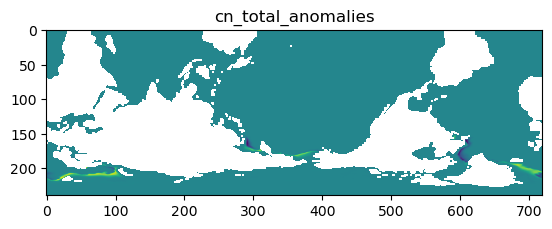

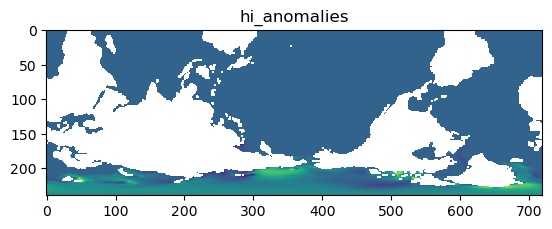

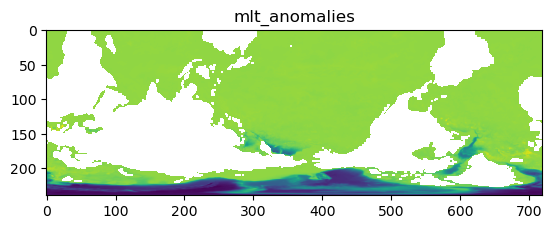

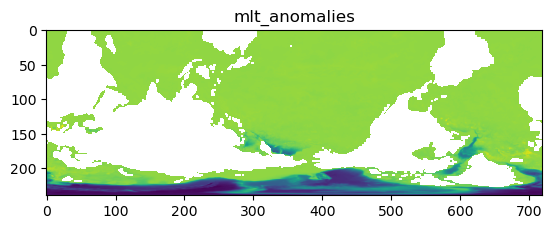

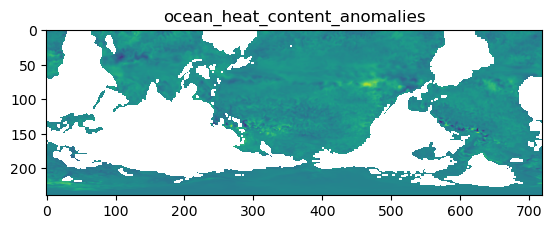

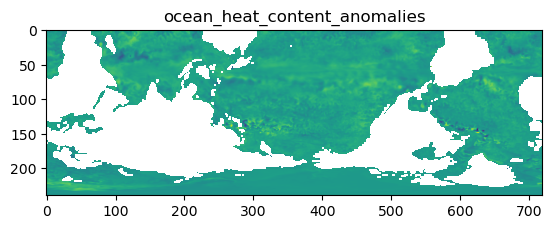

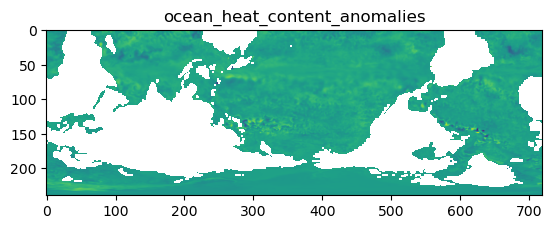

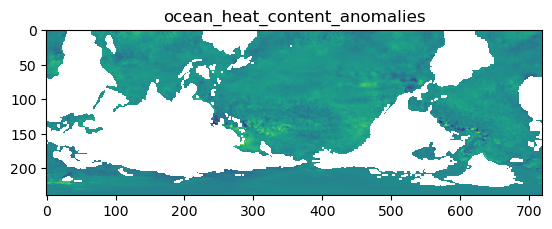

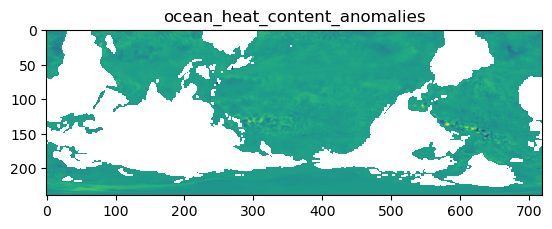

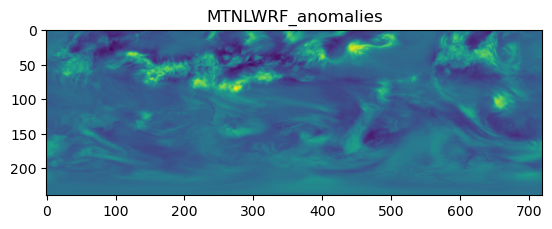

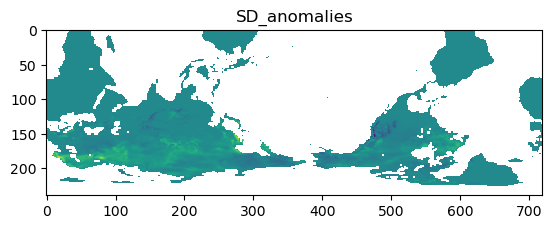

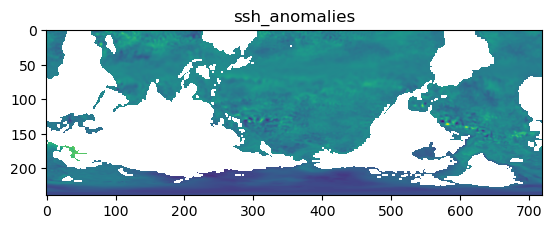

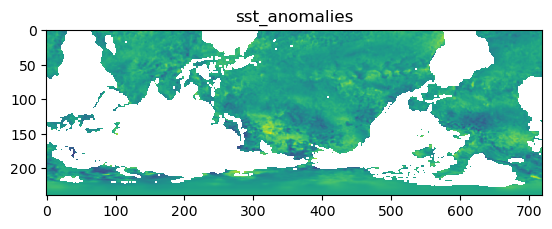

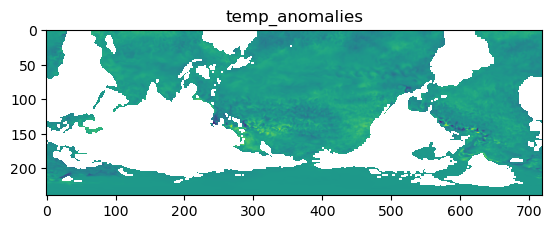

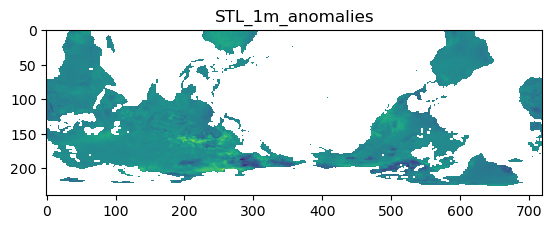

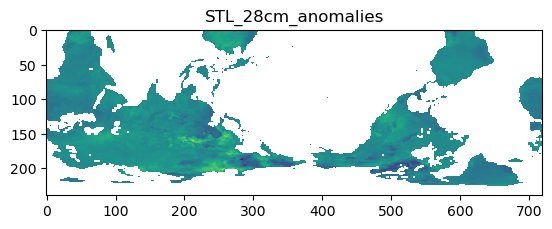

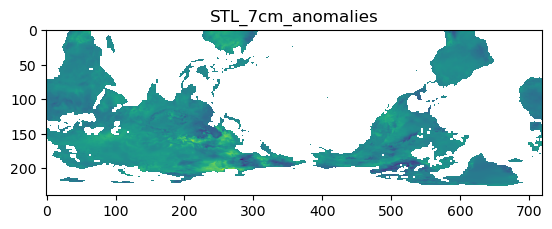

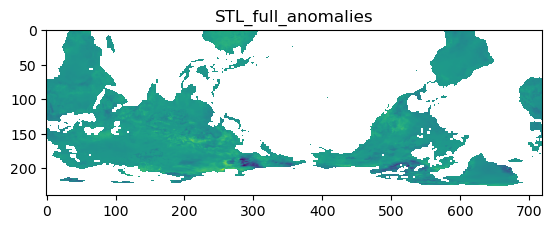

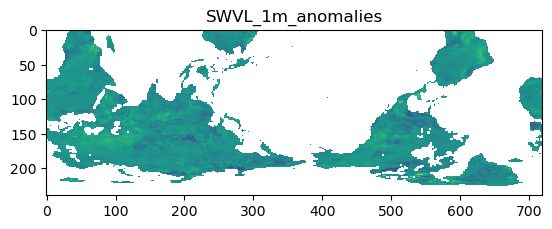

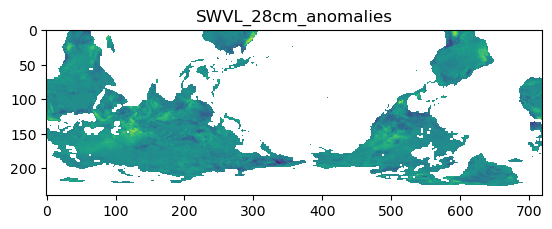

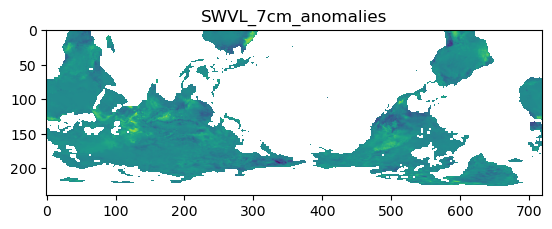

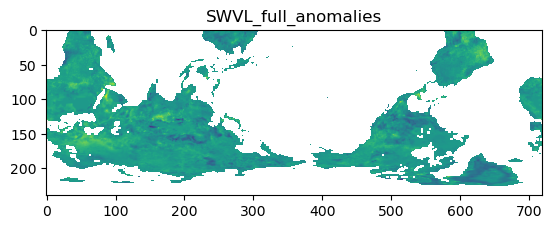

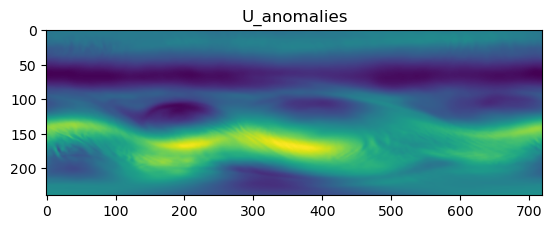

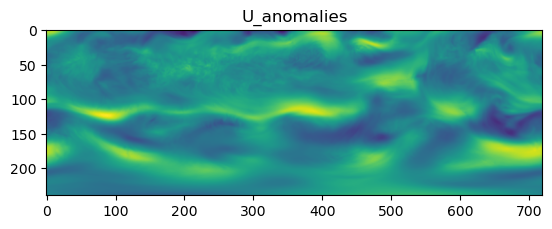

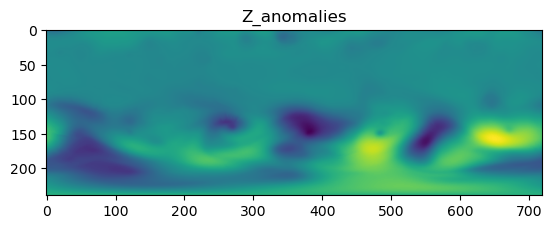

In [32]:
for i_dataset in range(len(list_datasets_anoms)):
    # print(list_datasets_anoms[i_dataset])
    # print(dt.datetime.now())
    anomalies = xr.open_dataset(list_datasets_anoms[i_dataset])
    var_name_xarray = list(anomalies.data_vars.keys())[0]
    plt.imshow(anomalies[var_name_xarray][0].values)
    plt.title(var_name_xarray)
    plt.show()
    plt.close('all')
    # aaaa
    # path_trends = list_datasets_anoms[i_dataset].replace('DailyAnoms','trends')
    # path_anoms_final = list_datasets_anoms[i_dataset].replace('DailyAnoms','DailyDetrendedAnoms')
    # trend = get_trend(anomalies, var_name_xarray.replace('_anomalies',''), path_trends)
    # detrended_dataset = detrend(anomalies, var_name_xarray, trend, path_anoms_final)